# **Generating our graph**

Here, H've created a random graph which always is connected.

In [ ]:
import networkx as nx

In [ ]:
import random

V = random.randint(6, 12)
MAX_EDGES = V * (V -1) * (1 / 2)
E = random.randint(MAX_EDGES//2+1, MAX_EDGES)
print(V, MAX_EDGES, E)

6 15.0 8


In [ ]:
G = nx.dense_gnm_random_graph(V, E)

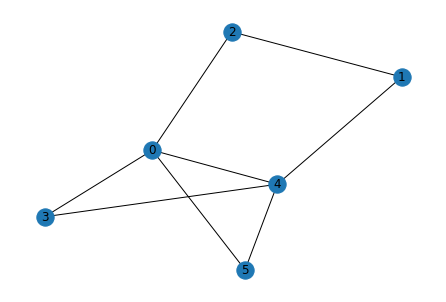

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)

# **Algorithm**

## **Implementation**

In this part, I've defined some functions for our algortithm!

This function, generates initial population based on given size.
My represantation is binary. In this represantation, We have an array(list) with the length of V which is number nodes in our graph.

In [ ]:
def initial_population_generator(pop_size = 100, gen_size=V):
  population = []
  for i in range(pop_size):
    current_gen = [0 for i in range(gen_size)]
    for j in range(gen_size):
      current_gen[j] = random.randint(0, 1)
    population.append(current_gen)

  return population

This function flips a given bit in our array.

In [ ]:
def flip(val):
  return 1 - val

Mutation for a single gen

In [ ]:
def mutation(gen, probability=0.75):
  p = random.uniform(0, 1)
  _, is_comp = compute_fitness_ind(gen, all_edges = list(G.edges))
  if is_comp:
    probability /= 3
  if p <= probability:
    index = random.randint(0, len(gen) - 1)
    gen[index] = flip(gen[index])
  
  return gen

Mutation in population

In [ ]:
def do_mutation(population, probability = 0.75):
  for i in range(len(population)):
    population[i] = mutation(population[i], probability=0.75)
  
  return population

This function does a crossover and generates two new gens.

In [ ]:
def crossover(f_gen, s_gen):
  crossover_point = random.randint(0, len(f_gen) - 1)
  f_gen_n = f_gen.copy()
  s_gen_n = s_gen.copy()
  f_gen_n[:crossover_point], s_gen_n[:crossover_point] = s_gen[:crossover_point], f_gen[:crossover_point]
  return f_gen_n, s_gen_n

In [ ]:
def indexes_generator(max_ind):
  f = random.randint(0, max_ind)
  s = random.randint(0, max_ind)
  while f == s:
    s = random.randint(0, max_ind)
  return f, s

This function does crossover for given number of times.

In [ ]:
def do_crossover(population, number_of_crossover=20):
  for i in range(number_of_crossover):
    fi, si = indexes_generator(len(population) - 2)
    new_f, new_s = crossover(population[fi], population[si])
    population.append(new_f)
    population.append(new_s)
  return population

These functions are related to our fitness function.
our fitness calculates number of edges which are connected to our selected nodes then divides this number by the whole number of edges in our graph.
Finally, divides this number by number of selected nodes.
Our fitnees is increamental which means we must achieve the lergest value of fitness.

In [ ]:
def make_tuples_increamental(l):
  for i in range(len(l)):
    if l[i][0] > l[i][1]:
      l[i] = (l[i][1], l[i][0])
    
  return l

In [ ]:
def make_set_of_edges(graph, nodes):
  list_of_edges = []
  for i in nodes:
    list_of_edges.extend(list(graph.edges([i])))
  
  return list(set(make_tuples_increamental(list_of_edges)))

In [ ]:
def fitness_func(current_edges, all_edges, number_of_nodes):
  if number_of_nodes == 0:
    return 0, False
  return (len(current_edges) / len(all_edges)) / number_of_nodes, (len(current_edges) / len(all_edges)) == 1

In [ ]:
def compute_fitness_ind(gen, all_edges = list(G.edges)):
  nodes = []
  for i in range(len(gen)):
    if gen[i]:
      nodes.append(i)
  edges = make_set_of_edges(G, nodes)
  cf, is_complete = fitness_func(edges, all_edges, len(gen))
  return cf, is_complete

These two functions select best gens in our population.

In [ ]:
def sort_func(gen):
  return compute_fitness_ind(gen, all_edges = list(G.edges))[0]

In [ ]:
def selection(population, size = 100):
  return population[:size]

In [ ]:
def is_population_complete(population):

  is_c = False
  best_fitness = -1
  bi = -1
  for i in range(len(population)):
    cf, is_complete = compute_fitness_ind(population[i], all_edges = list(G.edges))
    if is_complete:
      is_c = is_complete
    
      if cf > best_fitness:
        best_fitness = cf
        bi = i


  return is_c, bi, best_fitness

This function does our algorithm.

Represantation: binary

crossover: one-point crossover

mutation: mutates given gen with probability of 0.5

selection: selects gens with the highest fitness

In [ ]:
def GA(iterations=2000, initial_size = 30, n_crossover = 10, mutation_p = 0.75):
  population = initial_population_generator(pop_size = initial_size, gen_size=V)

  best_fitness = -1
  best_gen = None
  comp = False

  for i in range(iterations):
    if i % 1000 == 0:
      print(i)
    population = do_crossover(population, number_of_crossover=n_crossover)
    population = do_mutation(population, probability = mutation_p)

    population.sort(key=sort_func, reverse=True)
    population = selection(population, size = initial_size)

    is_complete, best_index, bf = is_population_complete(population)

    if is_complete and (best_fitness < bf):
      print('Is complete ', i)
      comp = True
      best_fitness = bf
      best_gen = population[best_index].copy()

  return population[0], compute_fitness_ind(population[0], all_edges = list(G.edges)), comp

In [ ]:
best_gen, best_fitness, comp = GA()

0
Is complete  0
1000


In [ ]:
best_gen

[1, 1, 0, 0, 1, 1]

In [ ]:
best_fitness

(0.16666666666666666, True)

In [ ]:
comp

True

In [ ]:
nodes = []
cv = ['blue' for i in range(len(best_gen))]
for i in range(len(best_gen)):
  if best_gen[i]:
    nodes.append(i)
    cv[i] = 'red'

In [ ]:
cv

['red', 'red', 'blue', 'blue', 'red', 'red']

## **Plots**

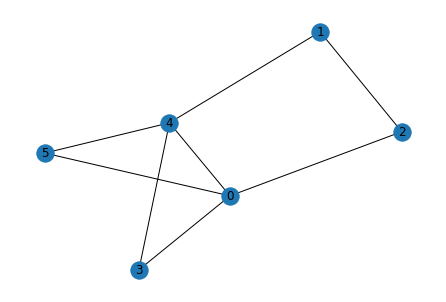

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)

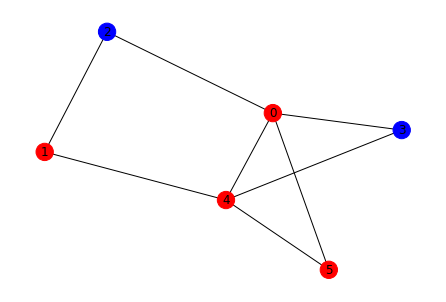

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(G, node_color=cv, with_labels=True)